# Hands On Machine Learning with Scikit Learn Keras

## Chapter 2

## End-to-End Machine Learning Project

## Fetching the data

In [1]:
import os
import tarfile
import numpy as np
from six.moves import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path=HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path) # Downloading the file
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path = housing_path)
  housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()

### Very very Basic EDA

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76bc157dd0>,
      dtype=object)

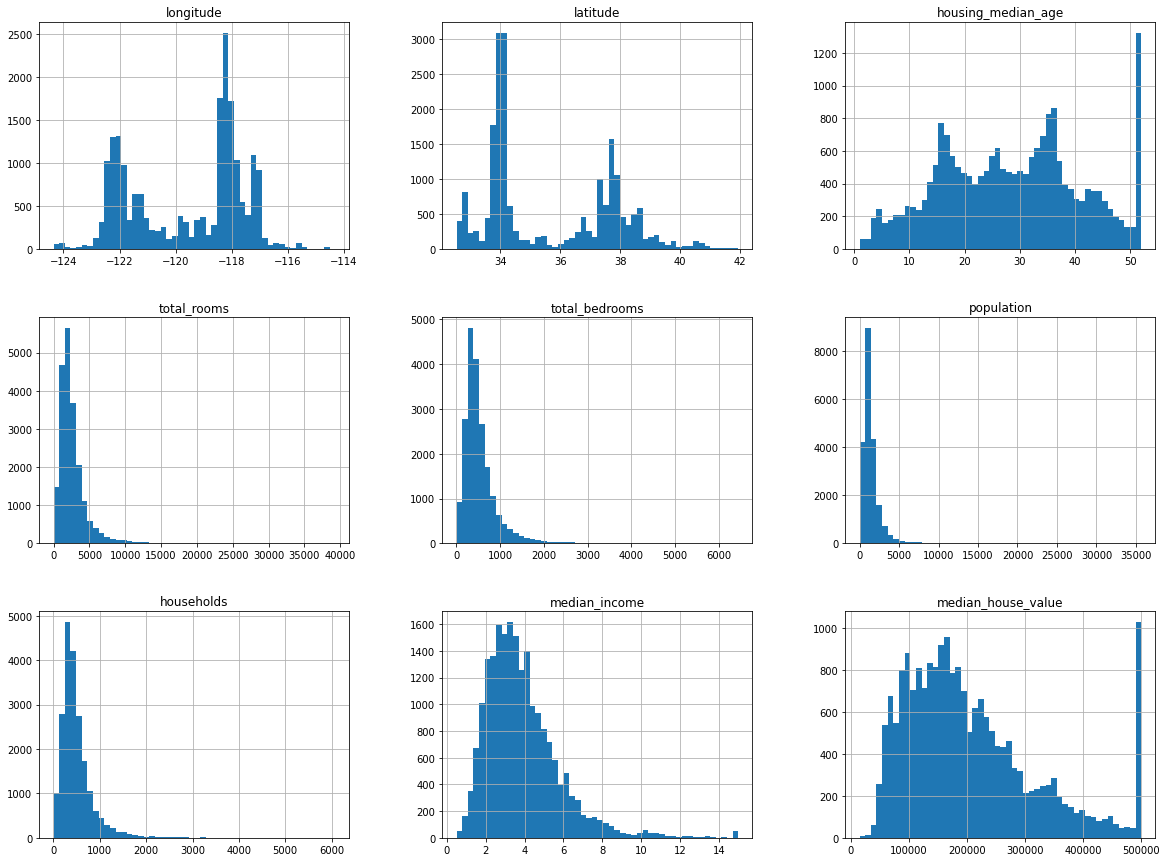

In [12]:
housing.hist(bins = 50, figsize = (20, 15))

### Stratified Spliting

In [15]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels = [1,2,3,4,5])

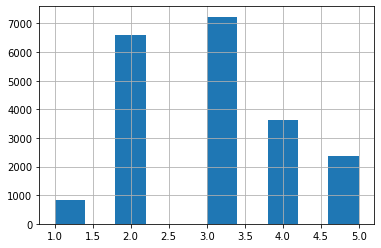

In [16]:
housing['income_cat'].hist()

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

In [18]:
split = StratifiedShuffleSplit(n_splits= 1, test_size = 0.3, random_state=1)

In [19]:
for train_idx, test_idx in split.split(housing, housing['income_cat']):
  strat_train_set = housing.loc[train_idx]
  strat_test_set = housing.loc[test_idx]

In [20]:
strat_test_set["income_cat"].value_counts()/ len(strat_test_set)

3    0.350614
2    0.318798
4    0.176357
5    0.114341
1    0.039890
Name: income_cat, dtype: float64

In [21]:
strat_train_set["income_cat"].value_counts()/ len(strat_train_set)

3    0.350568
2    0.318868
4    0.176287
5    0.114480
1    0.039798
Name: income_cat, dtype: float64

In [22]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", inplace = True, axis = 1)

In [23]:
housing = strat_train_set.copy()

### EDA 2.O

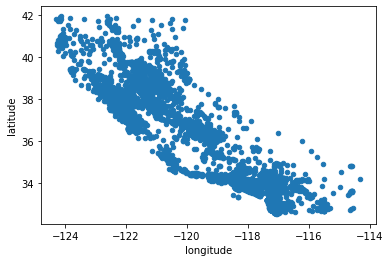

In [24]:
housing.plot(kind = 'scatter', x= 'longitude', y = 'latitude')

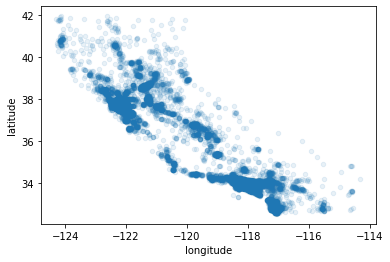

In [25]:
housing.plot(kind = "scatter", x = 'longitude', y = 'latitude', alpha = 0.1)

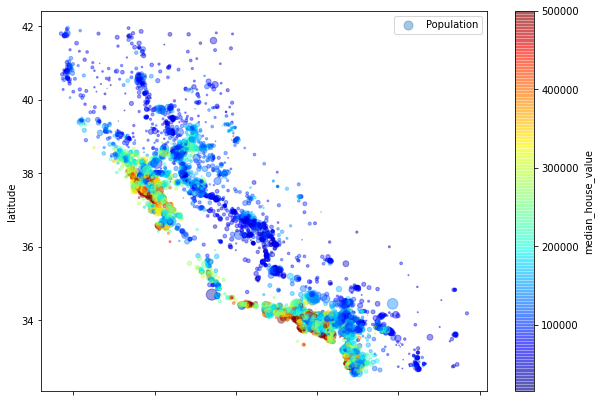

In [26]:
housing.plot(kind = "scatter", x = 'longitude', y = 'latitude', alpha = 0.4,
             s = housing['population']/100, label = "Population", figsize=(10,7),
             c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True)
plt.legend()

In [27]:
corr_matrx = housing.corr()

In [28]:
corr_matrx["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.685637
total_rooms           0.139536
housing_median_age    0.105457
households            0.069426
total_bedrooms        0.053722
population           -0.022511
longitude            -0.045556
latitude             -0.144757
Name: median_house_value, dtype: float64

In [29]:
corr_matrx

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924156,-0.113538,0.049260,0.073768,0.107623,0.060386,-0.011424,-0.045556
latitude,-0.924156,1.000000,0.017515,-0.040440,-0.071127,-0.114530,-0.074491,-0.084702,-0.144757
housing_median_age,-0.113538,0.017515,1.000000,-0.363895,-0.321496,-0.310379,-0.306480,-0.112410,0.105457
total_rooms,0.049260,-0.040440,-0.363895,1.000000,0.927352,0.864969,0.915862,0.201007,0.139536
total_bedrooms,0.073768,-0.071127,-0.321496,0.927352,1.000000,0.885743,0.980232,-0.007293,0.053722
population,0.107623,-0.114530,-0.310379,0.864969,0.885743,1.000000,0.914319,0.007051,-0.022511
households,0.060386,-0.074491,-0.306480,0.915862,0.980232,0.914319,1.000000,0.013221,0.069426
median_income,-0.011424,-0.084702,-0.112410,0.201007,-0.007293,0.007051,0.013221,1.000000,0.685637
median_house_value,-0.045556,-0.144757,0.105457,0.139536,0.053722,-0.022511,0.069426,0.685637,1.000000


In [30]:
import seaborn as sns

In [31]:
attributes = ['median_house_value', "median_income", "total_rooms",
              "housing_median_age"]

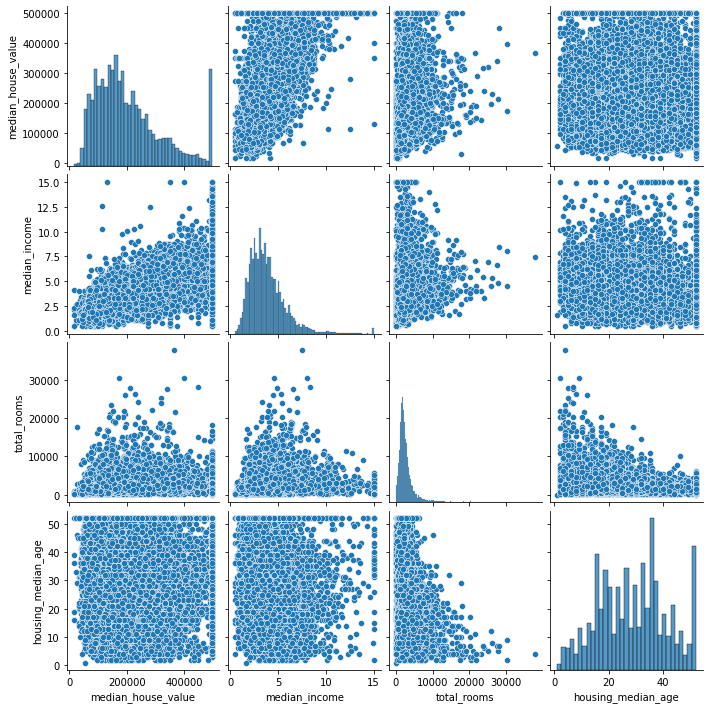

In [32]:
sns.pairplot(housing[attributes])

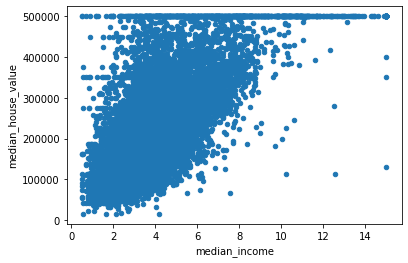

In [33]:
housing.plot(kind='scatter', x = 'median_income', y = 'median_house_value')

In [34]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19423,-121.04,37.69,5.0,9601.0,1639.0,4449.0,1575.0,4.5332,195500.0,INLAND
417,-122.26,37.90,37.0,2220.0,335.0,903.0,362.0,7.8336,371300.0,NEAR BAY
13022,-121.23,38.69,19.0,5268.0,849.0,2357.0,849.0,3.9226,148700.0,INLAND
19872,-119.29,36.34,35.0,1235.0,369.0,1246.0,341.0,1.4740,71000.0,INLAND
15034,-116.99,32.78,29.0,1114.0,163.0,385.0,154.0,5.4333,222800.0,<1H OCEAN


In [35]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing["total_bedrooms"]/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [36]:
corr_matrx = housing.corr()

In [37]:
corr_matrx['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.685637
total_rooms           0.139536
housing_median_age    0.105457
households            0.069426
total_bedrooms        0.053722
population           -0.022511
longitude            -0.045556
latitude             -0.144757
bedrooms_per_room    -0.259779
Name: median_house_value, dtype: float64

## Data Cleaning

In [38]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

#### Imputing Numerical Data

In [39]:
from sklearn.impute import SimpleImputer

In [40]:
imputer = SimpleImputer(strategy = "median")

In [41]:
housing_num = housing.drop("ocean_proximity", axis = 1)

In [42]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [43]:
imputer.statistics_

array([-118.49  ,   34.26  ,   29.    , 2113.    ,  433.    , 1163.    ,
        408.    ,    3.5313])

In [44]:
X = imputer.transform(housing_num)

In [45]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns)

#### Imputing Categorical Data

##### Ordinal Encoding

In [46]:
housing_cat = housing[['ocean_proximity']]

In [47]:
housing_cat.head()

,ocean_proximity
19423,INLAND
417,NEAR BAY
13022,INLAND
19872,INLAND
15034,<1H OCEAN


In [48]:
from sklearn.preprocessing import  OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

In [49]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [50]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

##### OneHotEncoding 

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
onehot_encoder = OneHotEncoder()

In [53]:
housing_cat_1hot = onehot_encoder.fit_transform(housing_cat)

In [54]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

#### Transformation Pipelines

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [56]:
num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy = 'median')),
                         ('std_scaler', StandardScaler())
])

In [57]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [58]:
from sklearn.compose import ColumnTransformer

In [59]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [60]:
full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),
                                   ("cat", OneHotEncoder(), cat_attribs)
])

In [61]:
housing_prepared = full_pipeline.fit_transform(housing)

### Training and Evaluating on the Training Set

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
from sklearn.metrics import mean_squared_error 

In [65]:
housing_prediction = lin_reg.predict(housing_prepared)

In [66]:
lin_mse = mean_squared_error(housing_labels, housing_prediction)

In [67]:
lin_rmse = np.sqrt(lin_mse)

In [68]:
lin_rmse

69329.18308178656

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [71]:
housing_predictions = tree_reg.predict(housing_prepared)

In [72]:
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)

In [73]:
tree_rmse

0.0

### Cross-Validation

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv = 10)

In [76]:
tree_rmse_scores = np.sqrt(-scores)

In [77]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [78]:
display_scores(tree_rmse_scores)

Scores: [69820.68008486 69296.16773993 67197.73992663 70557.74204635
 71361.51508585 70312.71380338 71518.3125099  72180.48223121
 74964.67241875 69941.25858263]
Mean: 70715.12844294889
Standard deviation: 1929.7641815001093


In [79]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv = 10)

In [80]:
lin_rmse_scores = np.sqrt(-lin_scores)

In [81]:
display_scores(lin_rmse_scores)

Scores: [72002.0897701  67793.62219628 65446.83614999 68618.80334537
 68677.16022171 71326.43898122 71363.18167404 71045.62145749
 68209.1253333  69514.69186474]
Mean: 69399.75709942328
Standard deviation: 1944.6399750060125


In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [84]:
forest_prediction = forest_reg.predict(housing_prepared)

In [85]:
forest_mse = mean_squared_error(housing_labels, forest_prediction)

In [86]:
forest_rmse = np.sqrt(forest_mse)

In [87]:
forest_rmse

18540.528008593625

In [88]:
forest_score = cross_val_score(forest_reg, housing_prepared,
                               housing_labels, scoring = "neg_mean_squared_error",
                               cv = 10)

In [89]:
forest_rmse = np.sqrt(-forest_score)

In [90]:
display_scores(forest_rmse)

Scores: [53019.67529076 49431.24722158 47963.85456842 49168.14728872
 47830.88616867 50187.95690351 53333.29201708 53679.58068413
 48453.03541308 48118.28420527]
Mean: 50118.595976122495
Standard deviation: 2224.0418552524006


## Grid Search

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
param_grid = [
              {'n_estimators':[3, 10, 30], 'max_features':[2, 4, 6, 8]},
              {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2,3,4]}
]

In [93]:
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid=param_grid, cv = 5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [94]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [95]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [96]:
cvres = grid_search.cv_results_

In [97]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

65201.737751490575 {'max_features': 2, 'n_estimators': 3}
56145.37734293358 {'max_features': 2, 'n_estimators': 10}
53153.422280487415 {'max_features': 2, 'n_estimators': 30}
61414.203116250275 {'max_features': 4, 'n_estimators': 3}
53881.85258764832 {'max_features': 4, 'n_estimators': 10}
50964.33680066716 {'max_features': 4, 'n_estimators': 30}
60258.48911815876 {'max_features': 6, 'n_estimators': 3}
52586.95274292907 {'max_features': 6, 'n_estimators': 10}
50770.71285944367 {'max_features': 6, 'n_estimators': 30}
60424.281447358 {'max_features': 8, 'n_estimators': 3}
52543.60154329272 {'max_features': 8, 'n_estimators': 10}
50267.21699237312 {'max_features': 8, 'n_estimators': 30}
62793.841102307 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54669.04690911798 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61387.23746395615 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53277.557775913454 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

## Final Prediction


In [98]:
final_model = grid_search.best_estimator_

In [99]:
X_test = strat_test_set.drop('median_house_value', axis = 1)
y_test = strat_test_set['median_house_value'].copy()

In [100]:
X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmes = np.sqrt(final_mse)

In [101]:
final_rmes

48796.12153709251